In [1]:
from __future__ import print_function, division, absolute_import
from glob import glob
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
plt.style.use("/atlas/users/coppinp/Tools/matplotlib_style")
matplotlib.rcParams['text.usetex'] = False

In [3]:
in_file = "../build/hadr00.out" # This is for proton on Aluminium
with open(in_file) as f:
    lines = f.readlines()

In [4]:
start_where = ["### Fill Cross Sections for" in x for x in lines]
start_index = np.where(start_where)[0][0] + 4
if( lines[start_index].split()[0]!="0" ):
    raise Exception("Index first data point should be zero")

In [10]:
variable_names = lines[start_index-2].split()
data = {name: [] for name in variable_names}
for line in lines[start_index:]:
    if( line[0]=="-" ):
        break
    else:
        data_i = line.split()
        for name, x in zip(variable_names,data_i):
            data[name].append( float(x) )
print( variable_names )

['N', 'E(MeV)', 'Elastic(b)', 'Inelastic(b)', 'Total(b)']


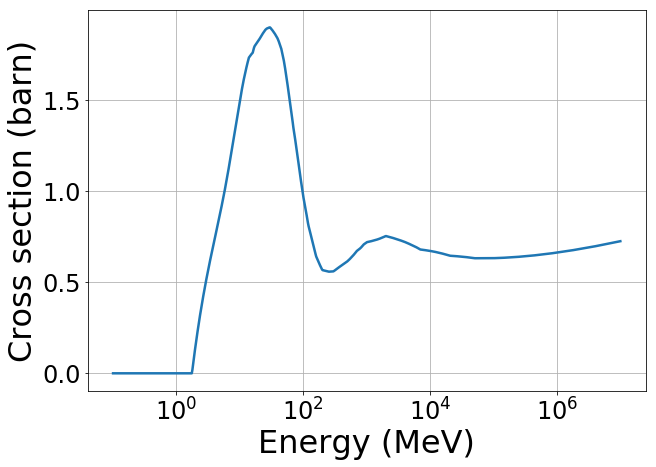

In [9]:
x = data['E(MeV)']
y = data['Total(b)']
ttt = plt.plot(x,y)
ttt = plt.xscale("log")
ttt = plt.xlabel("Energy (MeV)")
ttt = plt.ylabel("Cross section (barn)")